<a href="https://colab.research.google.com/github/LIMSADTools/test/blob/master/01_Analyse_Statistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explorer visuellement des données**



---


**Statistiques sous Python**

Il faut tout [d'abord importer](http://www.google.fr) ces modules. La dernière ligne permettra de voir le résultat des graphiques 

*   Élément de liste
*   Élément de liste



In [ ]:
import matplotlib.pyplot
import pandas as pd
import scipy.stats
import numpy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Données
Nous allons travailler sur les données tips. Vous pouvez trouver des informations (ici). Voici comment lire ces données dans python avec read_csv() de pandas.
tip in dollars,
*   tip in dollars,
*   bill in dollars,
*   sex of the bill payer,
*   whether there were smokers in the party,
*   day of the week,
*   time of day,
*   size of the party.



google drive access 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lecture d'un fichier texte
tips = pd.read_csv("/content/drive/MyDrive/Data-S/Intro/datasets/01-tips.csv", header = 0, sep = ",")

sur ces données, il est bien évidemment possible de voir quelques informations classiques.

In [ ]:
type(tips)

pandas.core.frame.DataFrame

In [ ]:
# informations diverses
tips.shape

(244, 7)

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [ ]:
list(tips.columns)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

Statistiques descriptives univariés
La fonction describe() permet de décrire toutes les variables quantitatives d'un jeu de données directement.

In [ ]:
# résumé basique
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


**Quantitative**
Il est possible de sélectionner les variables soit via les crochets [], soit par un point ..

Les fonctions ci-dessous permettent de décrire une variable quantitative (ici "total_bill").

In [ ]:
tips.total_bill.mean()

19.785942622950824

In [ ]:
tips.total_bill.std()

8.902411954856856

In [ ]:
tips.total_bill.var()

79.25293861397826

In [ ]:
tips.total_bill.min()

3.07

In [ ]:
tips.total_bill.max()

50.81

In [ ]:
tips.total_bill.median() #df.colone.functionstat

17.795

In [ ]:
tips["total_bill"].quantile([.25, .5, .75])


0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64

In [ ]:
tips["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

**Histogramme**
Pour représenter graphiquement cette variable, pandas met à disposition (via le module matplotlib utilisé par pandas) des fonctions graphiques.

Pour réaliser un histogramme, nous utilisons la fonction hist(). Celle-ci peut prendre des options. La fonction plot() avec le paramètre kind avec la valeur "hist" revient au même résultat.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeca5347b8>,
      dtype=object)

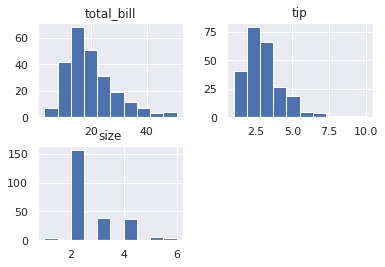

In [ ]:
tips.hist()

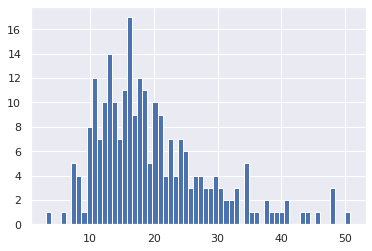

In [ ]:
tips.total_bill.hist(bins =60)


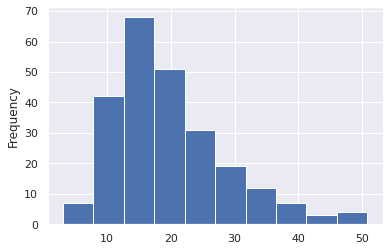

In [ ]:
tips.total_bill.plot(kind = "hist")


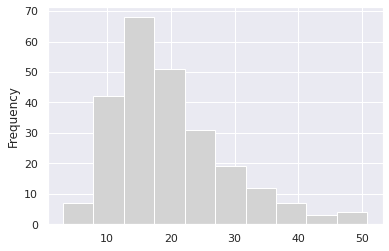

In [ ]:
tips.total_bill.plot(kind = "hist",color = "lightgrey")


**Boîtes à moustaches**
Enfin, pour les boîtes à moustaches, il faut passer par le DataFrame pour l'afficher, et choisir une variable spécifiquement éventuellement.

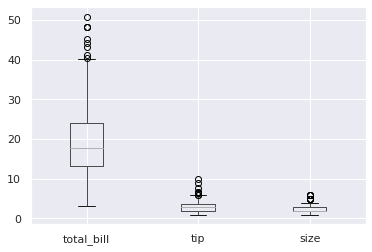

In [ ]:
tips.boxplot()

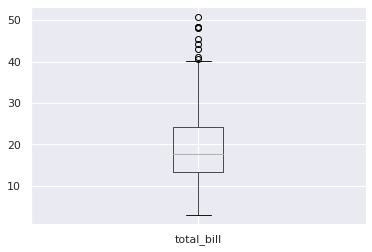

In [ ]:
tips.boxplot(column = "total_bill")

Qualitative
Pour les variables qualitatives, il y a plusieurs façons de faire pour obtenir la table d'occurences (ou des effectifs), ainsi que la table des proportions des modalités.

In [ ]:
tips.sex.describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [ ]:
tips.sex.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
tips.sex.value_counts()


Male      157
Female     87
Name: sex, dtype: int64

In [ ]:
pd.crosstab(tips.sex, "freq")

col_0,freq
sex,
Female,87
Male,157


In [ ]:
pd.crosstab(tips.sex, "freq", normalize=True)

col_0,freq
sex,
Female,0.356557
Male,0.643443


Diagramme en barres
Ensuite, pour réaliser un diagramme en barres, nous utilisons le type "bar" pour plot(). Les calculs de proportions précédents nous permettent d'afficher une représentation des proportions plutôt que des effectifs.

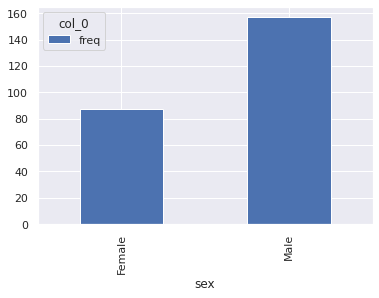

In [ ]:
t = pd.crosstab(tips.sex, "freq")
t.plot.bar()

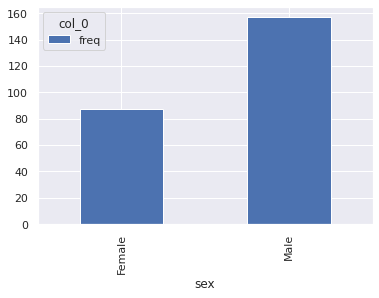

In [ ]:
t.plot(kind = "bar")


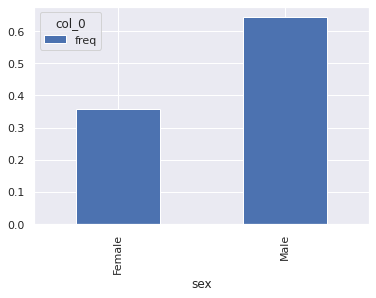

In [ ]:
t = pandas.crosstab(tips.sex, "freq", normalize=True)
t.plot(kind = "bar")

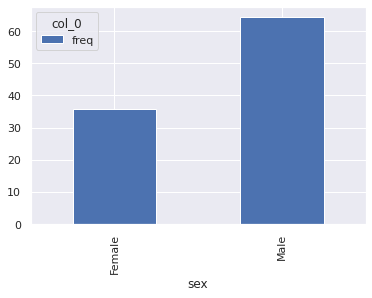

In [ ]:
(t * 100).plot(kind = "bar")


Diagramme circulaire
Et pour un diagramme circulaire, seul le tableau des effectifs produit par value_counts() nous permet de le réaliser.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdebed187f0>],
      dtype=object)

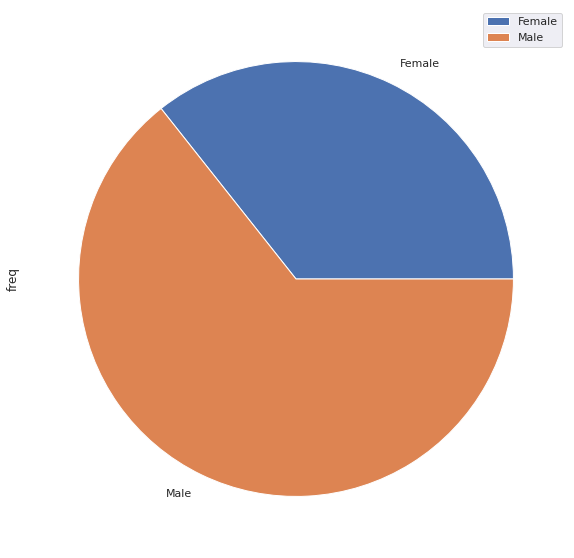

In [ ]:
t = pandas.crosstab(tips.sex, "freq")
t.plot.pie(subplots=True, figsize = (10, 10))

Statistiques descriptives bivariées
Quantitative - quantitative

In [ ]:
tips.total_bill.corr(tips.tip)


0.6757341092113641

In [ ]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
tips.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


Nuage de points¶


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


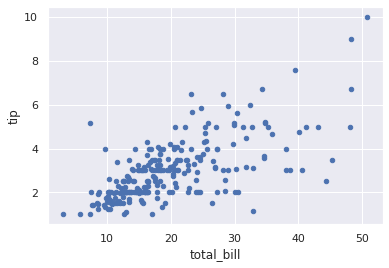

In [ ]:
tips.plot.scatter("total_bill", "tip")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdebfbe7358>,
      dtype=object)

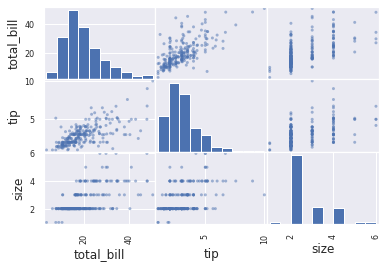

In [ ]:
pd.plotting.scatter_matrix(tips)


Qualitative - qualitative

In [ ]:
pandas.crosstab(tips.sex, tips.smoker)


smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [ ]:
pandas.crosstab(tips.sex, tips.smoker, margins=True)


smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [ ]:
pandas.crosstab(tips.sex, tips.smoker, normalize = True)


smoker,No,Yes
sex,,
Female,0.221311,0.135246
Male,0.397541,0.245902


normalizebool, {‘all’, ‘index’, ‘columns’}, or {0,1}, default False
Normalize by dividing all values by the sum of values.

If passed ‘all’ or True, will normalize over all values.

If passed ‘index’ will normalize over each row.

If passed ‘columns’ will normalize over each column.


**to verify**


In [ ]:
pandas.crosstab(tips.sex, tips.smoker, normalize = 'columns')


smoker,No,Yes
sex,,
Female,0.357616,0.354839
Male,0.642384,0.645161


In [ ]:
pandas.crosstab(tips.smoker,tips.sex, normalize = 'index', margins=True)

sex,Female,Male
smoker,,
No,0.357616,0.642384
Yes,0.354839,0.645161
All,0.356557,0.643443


Diagramme en barres


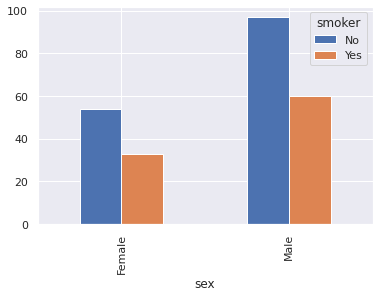

In [ ]:
t = pandas.crosstab(tips.sex, tips.smoker)
t.plot.bar()

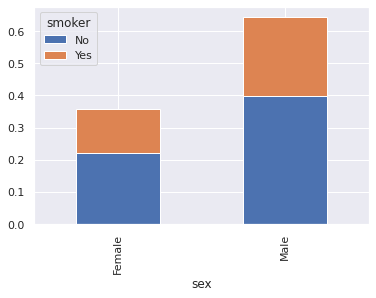

In [ ]:
t = pandas.crosstab(tips.sex, tips.smoker, normalize=True)
t.plot.bar(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdebec5a7b8>,
      dtype=object)

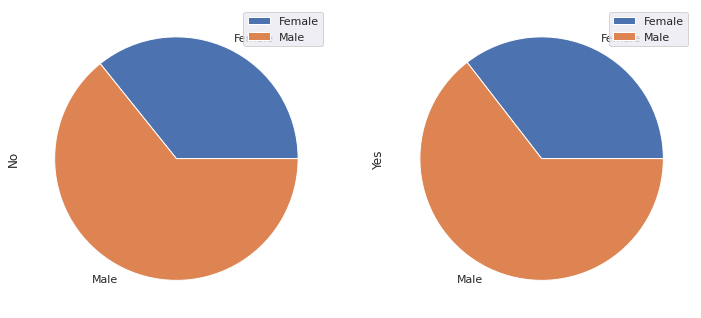

In [ ]:
t = pandas.crosstab(tips.sex, tips.smoker)
t.plot.pie(subplots=True, figsize = (12, 6))

Qualitative - quantitative


In [ ]:
tips.groupby("sex").sum()


,total_bill,tip,size
sex,,,
Female,1570.95,246.51,214
Male,3256.82,485.07,413


In [ ]:
tips.groupby("sex")["total_bill"].agg([numpy.mean, numpy.std, numpy.median, numpy.min, numpy.max])

#select mean,count(*) from DF
#group by sex

,mean,std,median,amin,amax
sex,,,,,
Female,18.056897,8.009209,16.40,3.07,44.30
Male,20.744076,9.246469,18.35,7.25,50.81


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdec0e34780>,
      dtype=object)

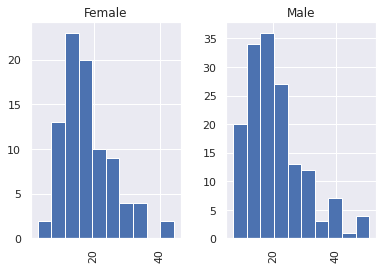

In [ ]:
tips.hist(column = "total_bill", by = "sex")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdec0e34ac8>,
      dtype=object)

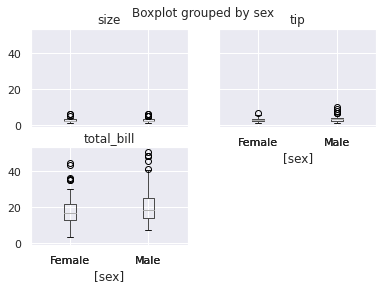

In [ ]:
tips.boxplot(by = "sex")


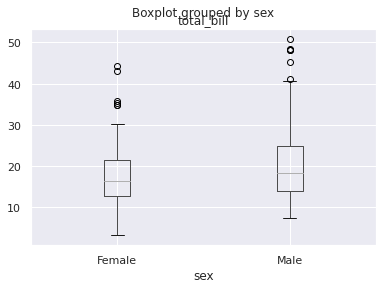

In [ ]:
tips.boxplot(column = "total_bill", by = "sex") 


**Exercices**
A partir du fichier diamonds.csv , analyser les données suivant le déroulement classique

*  Description de chaque variable
*  Recherche des liens entre le prix (price) et les autres variables 

**seaborn**
Ce module, importé ci-dessous, est basé sur matplotlib. Il faut donc ajouter la ligne %matplotlib inline dans un notebook, pour pouvoir voir les graphiques.
Dans ce TP, nous allons utiliser le package seaborn, ainsi que le jeu de données tips, 

In [ ]:
import seaborn as sns

%matplotlib inline

sns.fonction(x,y,data)

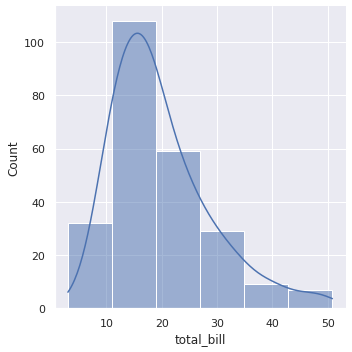

In [ ]:
sns.displot(data=tips, x="total_bill",bins = 6,kind='hist',kde = True)

Variable quantitative
La fonction distplot() nous permet de réaliser les graphiques de distribution d'une variable quantitative. Par défaut, elle réaliser un histogramme avec une estimation de la densité.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


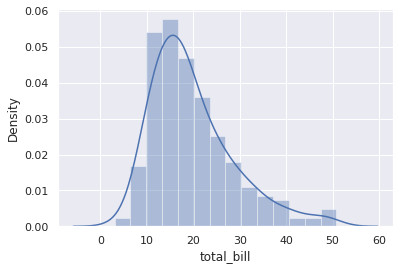

In [ ]:
seaborn.distplot(tips.total_bill)

Pour ne garder que l'histogramme, on indique qu'on ne souhaite pas l'estimation de la densité (paramètre kde). Ainsi, l'histogramme devient en effectifs.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


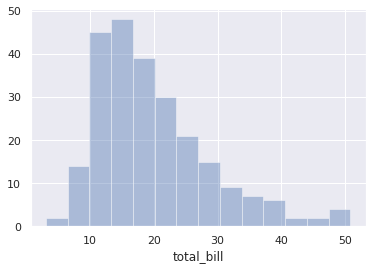

In [ ]:
seaborn.distplot(tips.total_bill, kde = False)


De même, on ne peut vouloir que la densité. Auquel cas, on supprimer l'histogramme avec le paramètre hist.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


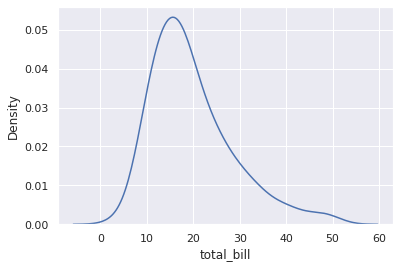

In [ ]:
seaborn.distplot(tips.total_bill, hist = False)


Il est possible de choisir le nombre de bins, avec le paramètre bins.

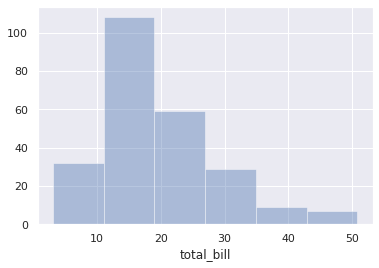

In [ ]:
seaborn.distplot(tips.total_bill, bins = 6, kde = False)


Il est aussi possible de choisir les limites des intervalles, avec le même paramètre bins. Dans ce cas, il faut bien évidemment veiller à faire un histogramme en densité. Si on ne souhaite pas avoir l'estimation de la densité, on peut l'obtenir tout de même avec le paramètre norm_hist.

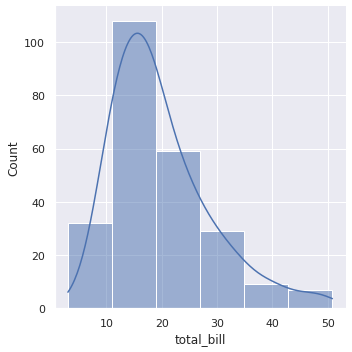

In [ ]:
sns.displot(data=tips, x="total_bill",bins = 6, kind='hist',kde = True)


C'est la fonction boxplot() qui nous permet de réaliser une boîte à moustache (soit verticale en mettant la variable en y, soit horizontale en la mettant en x).



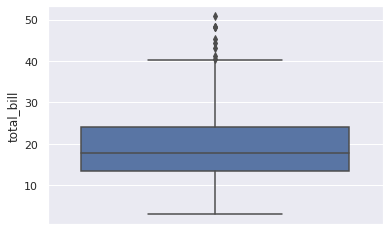

In [ ]:
seaborn.boxplot(y = "total_bill", data = tips)


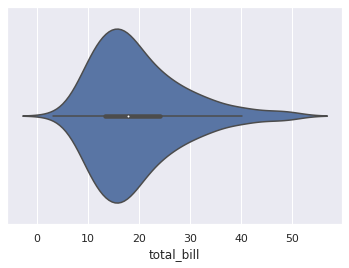

In [ ]:
#Draw a combination of boxplot and kernel density estimate.
seaborn.violinplot(x = "total_bill", data = tips)


# Variable qualitative
Le diagramme en barres en effectifs est obtenu via la fonction countplot(). Il est soit horizontal (avec la variable en x), soit vertical (en y).




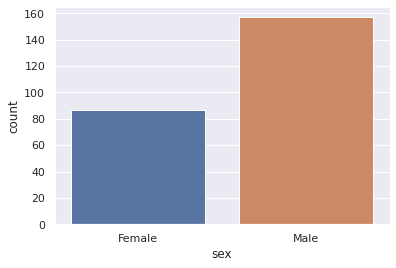

In [ ]:
seaborn.countplot(x = "sex", data = tips)


Pour avoir la version en pourcentages (ou en proportions) de ce graphique, nous devons utiliser la fonction barplot(), sur la table de proportions calculée avant. Cette fonction réalise un calcul (moyenne par défaut) sur une variable (ici freq) en fonction des modalités d'une autre variable (sex ici donc).

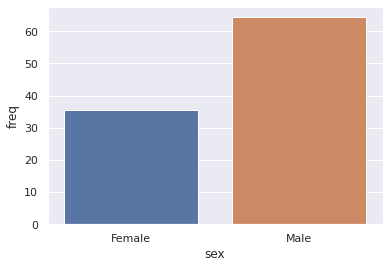

In [ ]:
t = pandas.crosstab(tips.sex, "freq", normalize=True)
t = t.assign(sex = t.index, freq = 100 * t.freq)
seaborn.barplot(x = "sex", y = "freq", data = t)

Enfin, comme précédemment, la fonction factorplot() nous permet d'accéder aux sous-fonctions avec le choix dans kind.

count : diagramme en barres (dénombrement)
bar : diagramme en barres avec calcul


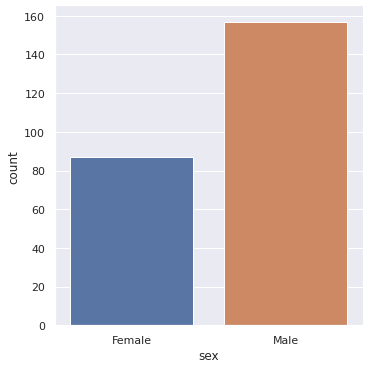

In [ ]:
seaborn.catplot(x = "sex", data = tips, kind = "count")


Var quantitative - Var quantitative
Pour réaliser le nuage de points, on utilise la fonction jointplot(). Elle a l'avantage d'ajouter par défaut les histogrammes de chaque variable. Elle réalise par défaut le nuage de points simple (scatter). Comme pour factorplot(), on va pouvoir choisir le type de graphique avec le paramètre kind.

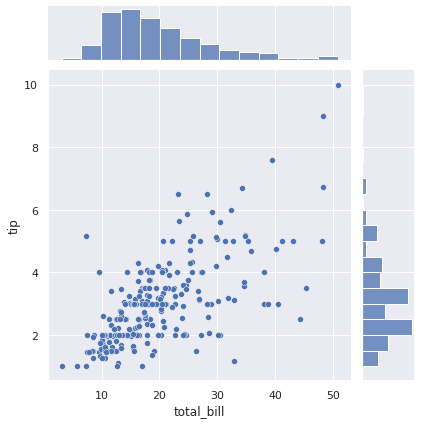

In [ ]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips)


En choississant le type reg, on obtient en plus l'ajustement linéaire de la variable en y par celle en x.



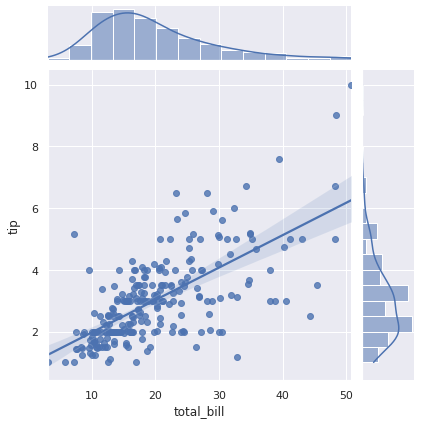

In [ ]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg")


On peut obtenir une heatmap, non pas avec des rectangles mais un pavage hexagonal, avec kind = "hex".



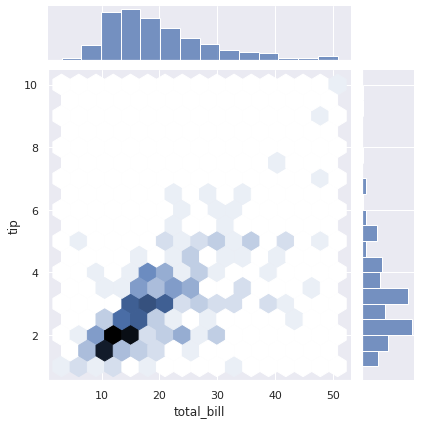

In [ ]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")


Enfin, on peut avoir une estimation de la densité en 2d avec le type kde.



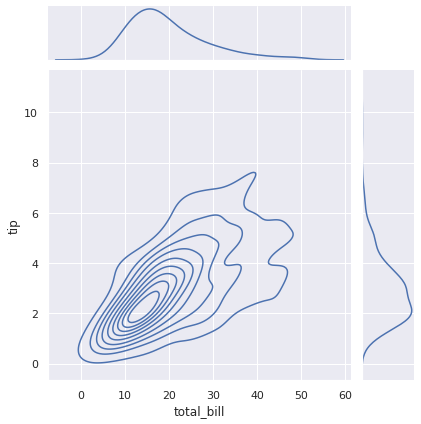

In [ ]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "kde")


Si on souhaite ne pas avoir les distributions marginales, la fonction regplot() nous permet de réaliser le nuage de points avec ou sans ajustement (paramètre fit_reg). On peut aussi n'afficher que l'ajustement.

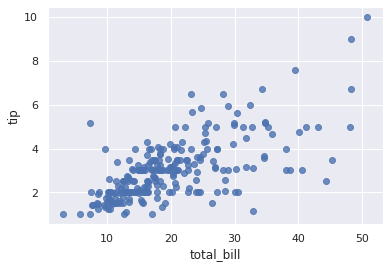

In [ ]:
seaborn.regplot("total_bill", "tip", data = tips, fit_reg = False)


Il est possible d'obtenir directement tous les nuages de points 2 à 2, avec la fonction pairplot(). Le paramètre vars permet de sélectionner certaines variables. Par défaut, la fonction utilise toutes les variables numériques.

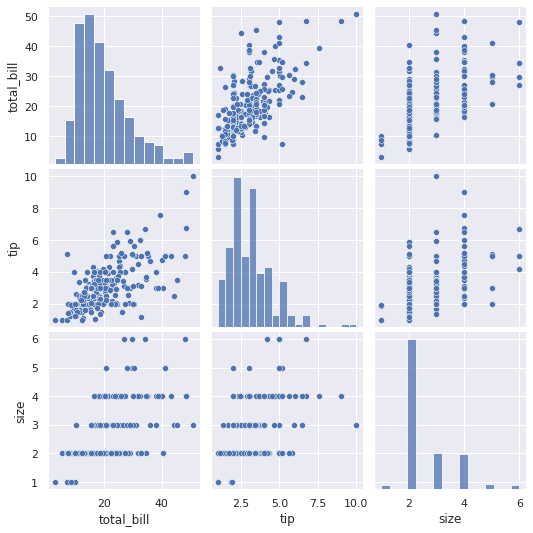

In [ ]:
seaborn.pairplot(data = tips, vars = ["total_bill", "tip", "size"])


## Var qualitative - Var qualitative
Pour obtenir le diagramme en barres séparées (en effectifs), nous utilisons la fonction factorplot() avec le paramètre hue (celui-ci provient de la fonction countplot()).

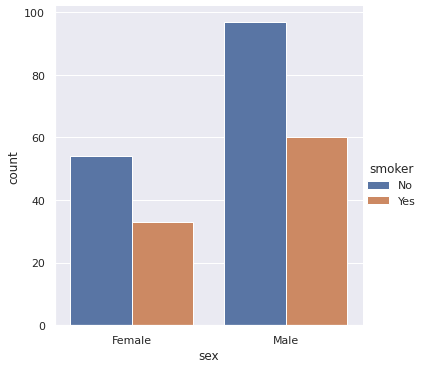

In [ ]:
seaborn.catplot(x = "sex", hue = "smoker", data = tips, kind = "count")



Cette fonction catplot() permet aussi un découpage en facette avec les paramètres row et col. Ici, nous découpons donc le graphique en fonction des modalités de smoker.



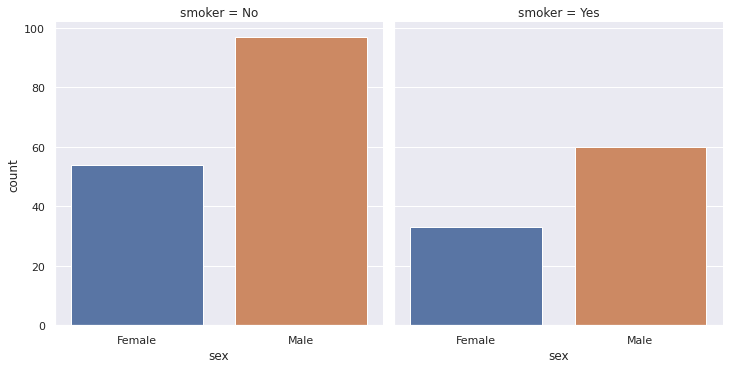

In [ ]:
seaborn.catplot(x = "sex", col = "smoker", data = tips, kind = "count")


In [ ]:
t = pandas.crosstab(tips.sex,tips.smoker , normalize=True)

In [ ]:
t.index

Index(['Female', 'Male'], dtype='object', name='sex')

In [ ]:
t=t*100

In [ ]:
t

smoker,No,Yes
sex,,
Female,22.131148,13.524590
Male,39.754098,24.590164


In [ ]:
t = t.assign(sex = t.index)
tm = pandas.melt(t, id_vars = "sex")
tm = tm.assign(value = 100 * tm.value)

seaborn.catplot("sex", y = "value", col = "smoker", data = tm, kind = "bar")

KeyError: ignored

Une autre représentation est de visualiser la table de contingence avec une heatmap (la couleur dépendra du nombre d'individus pour chaque couple de modalité).

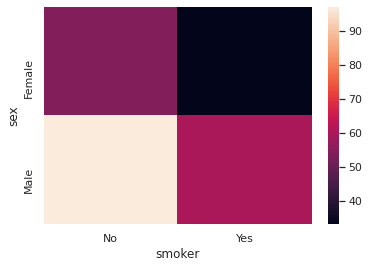

In [ ]:
seaborn.heatmap(pandas.crosstab(tips.sex, tips.smoker))


Var quantitative - Var qualitative¶


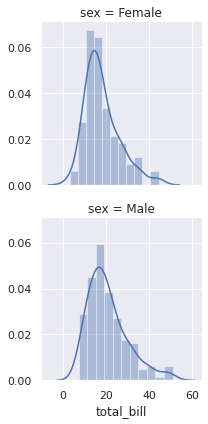

In [ ]:
p = seaborn.FacetGrid(tips, row = "sex")
p.map(seaborn.distplot, "total_bill")

Les boîtes à moustaches sont elles faciles à créer avec catplot() (ou boxplot() directement).



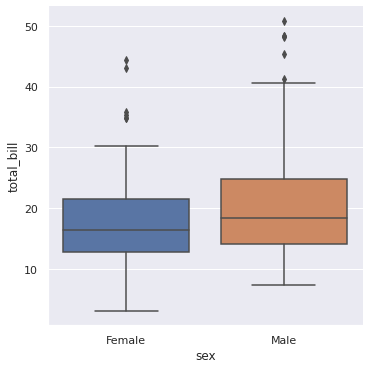

In [ ]:
seaborn.catplot(x = "sex", y = "total_bill", data = tips, kind = "box")


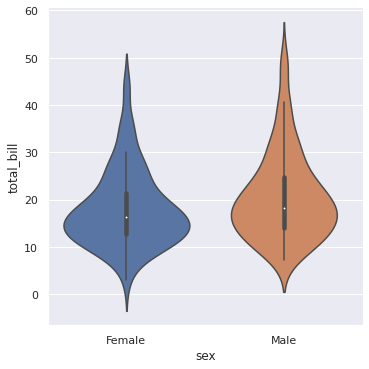

In [ ]:
seaborn.catplot(x = "sex", y = "total_bill", data = tips, kind = "violin")

Multivariables
3 quantitatives
Dans ce cas, nous cherchons à faire une heatmap du croisement entre les versions discrétisées en intervalles de deux variables quantitatives, la couleur d'un rectangle dépendant de la moyenne (ici mean du module numpy) d'une troisième variable. On créé la table puis l'affiche.

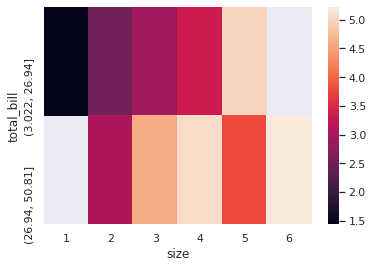

In [ ]:
t = pandas.crosstab(pandas.cut(tips.total_bill, bins = 2),
                    tips["size"],
                    values = tips.tip, aggfunc = numpy.mean)
seaborn.heatmap(t)


2 quantitatives et 1 qualitative
Dans ce cas, il est possible de faire le nuage de points avec la fonction lmplot(), en utilisant le principe de grille (comme factorplot()) avec un découpage en colonnes (via col). On peut aussi améliorer la distinction en ajoutant une couleur différente sur la variable sex avec le paramètre hue.

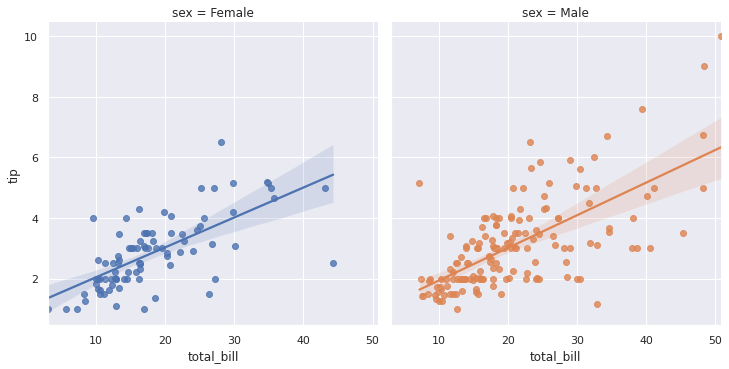

In [ ]:
seaborn.lmplot("total_bill", "tip", hue = "sex", col = "sex", data = tips)


1 quantitative et 2 qualitatives
Il est possible de créer les histogrammes de la variable quantitative pour chaque couple de modalités sur les deux variables qualitatives avec FacetGrid().

In [ ]:
import warnings
warnings.filterwarnings('ignore')



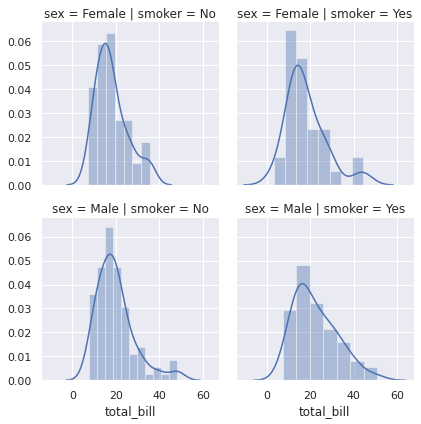

In [ ]:
p = seaborn.FacetGrid(tips, row = "sex", col = "smoker")
p.map(seaborn.distplot, "total_bill")

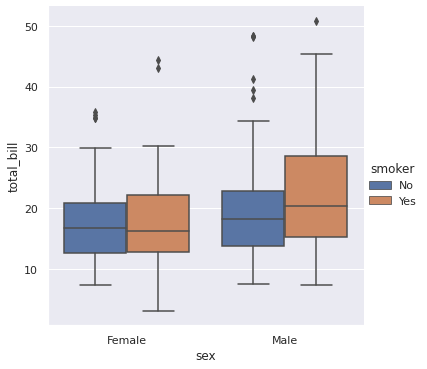

In [ ]:
seaborn.catplot(x = "sex", y = "total_bill", hue = "smoker", data = tips, kind = "box")

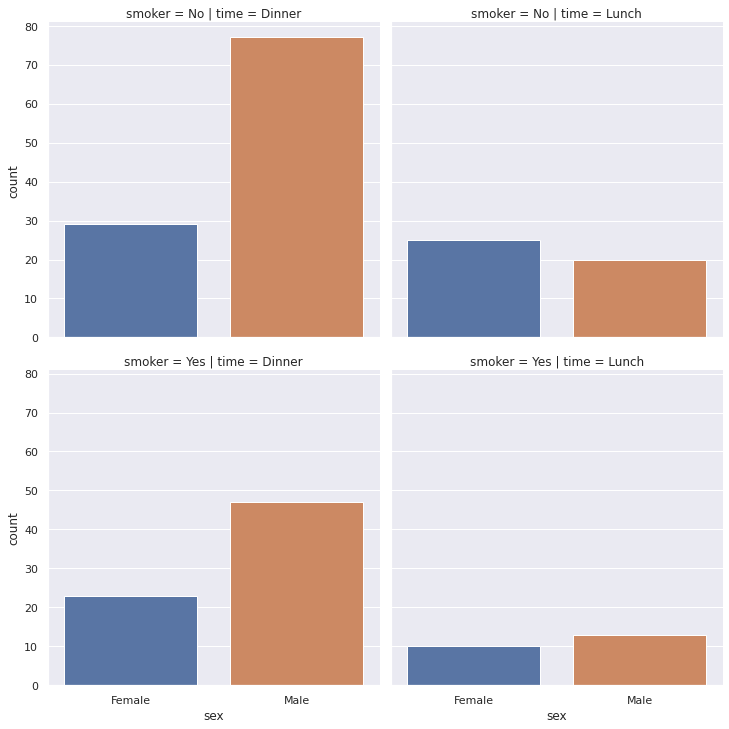

In [ ]:
#3 qualitatives
seaborn.catplot(x = "sex", row = "smoker", col = "time", data = tips, kind = "count")

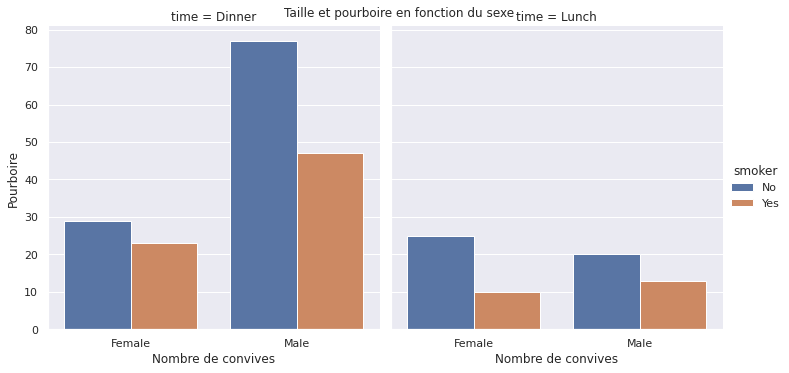

In [ ]:
p=seaborn.catplot(x = "sex", hue = "smoker", col = "time", data = tips, kind = "count")
p.fig.suptitle("Taille et pourboire en fonction du sexe")
p.set_axis_labels("Nombre de convives", "Pourboire")

A faire
A partir du jeu de données Computers, vous devez répondre aux questions suivantes, avec seaborn.

In [ ]:
# Lecture d'un fichier texte
ordis = pd.read_csv("/content/drive/MyDrive/Data-S/Intro/datasets/01-Computers.csv", header = 0, sep = ",")

In [ ]:
ordis.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


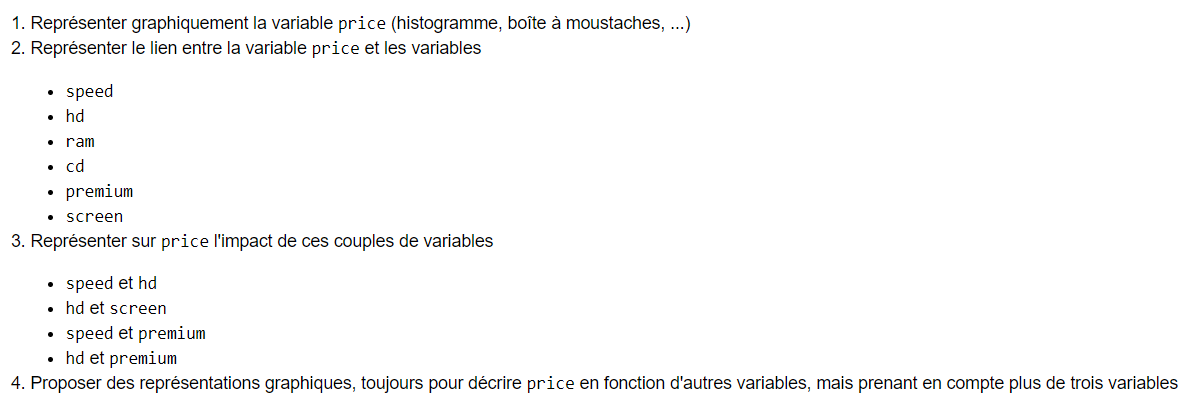